In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/trojrobert/Classification-of-heart-disease-uci-data-/master/heart.csv')

In [3]:
#patients that have heart disease
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

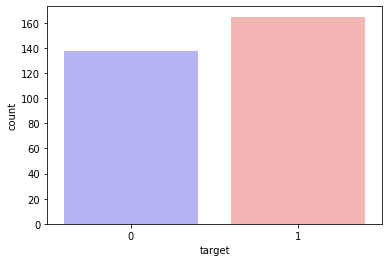

In [4]:
sns.countplot(data=data,x='target',palette = 'bwr')

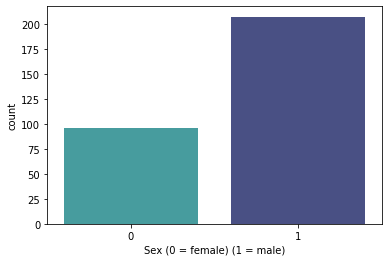

In [5]:
#visualizing males and females
sns.countplot(x='sex',data=data,palette='mako_r')
plt.xlabel("Sex (0 = female) (1 = male)")
plt.show()

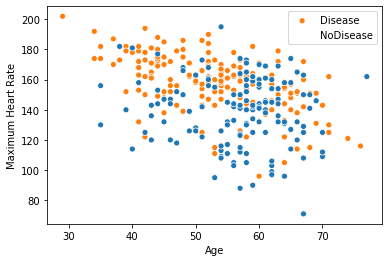

In [6]:
# lets see relation between age and maximum heart rate(thalach)
sns.scatterplot(data=data,x = 'age',y='thalach',hue='target')
plt.legend(['Disease','NoDisease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,13]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [9]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
classifier = classifier.fit(X_train,y_train)

In [12]:
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.868421052631579


In [13]:
classifier = KNeighborsClassifier(n_neighbors = 6,metric='minkowski',p=2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.8289473684210527


In [14]:
classifier = KNeighborsClassifier(n_neighbors = 7,metric='minkowski',p=2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.8421052631578947


In [15]:
classifier = KNeighborsClassifier(n_neighbors = 8,metric='minkowski',p=2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy)


0.868421052631579


In [16]:
classifier = KNeighborsClassifier(n_neighbors = 8,metric='minkowski',p=2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.868421052631579


In [17]:
cm = confusion_matrix(y_test,y_pred)

In [18]:
pd.DataFrame(cm)

,0,1
0,27,6
1,4,39


In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,X,y,cv=10,scoring='accuracy')
(scores)

array([0.61290323, 0.64516129, 0.61290323, 0.67741935, 0.74193548,
       0.5       , 0.66666667, 0.76666667, 0.5862069 , 0.65517241])

In [20]:
scores.mean()

0.6465035224323322

In [21]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

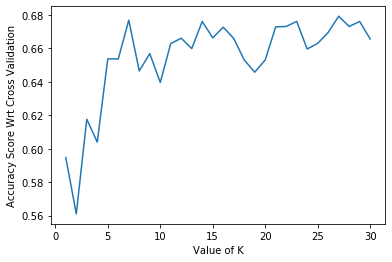

In [22]:
sns.lineplot(x=k_range,y=k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score Wrt Cross Validation')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gs = GridSearchCV(KNeighborsClassifier(),
                 grid_params,
                 verbose=1,
                 cv=3,
                 n_jobs=-1)
gs_results = gs.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.2s finished
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
gs_results.best_score_

0.8502202643171806

In [25]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [26]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [27]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)

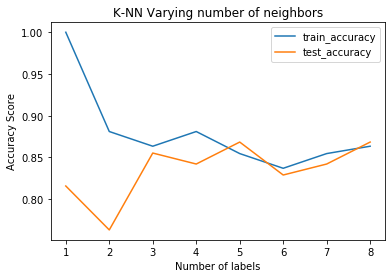

In [28]:
plt.title('K-NN Varying number of neighbors')
sns.lineplot(x=neighbors,y=train_accuracy,label = 'train_accuracy')
sns.lineplot(x=neighbors,y=test_accuracy,label='test_accuracy')
plt.legend()
plt.xlabel('Number of labels')
plt.ylabel('Accuracy Score')
plt.show()